# **Market Basket Analysis**
Market basket analysis adalah suatu metodologi untuk melakukan analisis buying habit konsumen dengan menemukan asosiasi antar beberapa item yang berbeda, yang diletakkan konsumen dalam shopping basket (keranjang belanja) yang dibeli pada suatu transaksi tertentu. Tujuan dari market basket analysis adalah untuk mengetahui produk-produk mana yang mungkin akan dibeli secara bersamaan

## **Algoritma Apriori**

Algoritma Apriori adalah suatu algoritma dasar yang diusulkan oleh Agrawal & Srikant pada tahun 1994 untuk penentuan frequent itemsets untuk aturan asosiasi boolean. Algoritma Apriori memberi kita sifat asosiatif dalam transaksi. Ini juga dikenal sebagai Aturan Asosiasi. Aturan asosiasi atau association rule adalah teknik untuk menemukan aturan asosiasi antara suatu kombinasi item. Terdapat 3 metrik untuk mengukur ketepatan aturan, yaitu :


### **1. Support**
Support adalah indikasi seberapa sering kumpulan item muncul pada dataset. Berikut perhitungan nilai support :

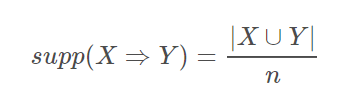

### **2. Confidence**
Confidence adalah suatu ukuran yang menunjukkan hubungan antar dua item secara conditional (berdasarkan suatu kondisi tertentu). Berikut perhitungan nilai confidence :

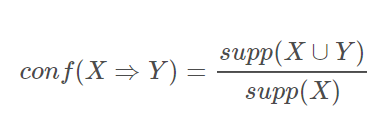

### **3. Lift**
Lift mengacu pada bagaimana peluang kedua item dibeli ketika item pertama dibeli. Berikut perhitungan nilai confidence :
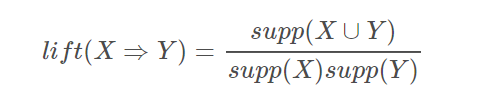



---



# **Bakery Market Basket Analysis**

## **1. Import Library**
Pertama-tama mengimpor library yang akan kita gunakan untuk analisis eksplorasi data dan visualisasi data.


In [ ]:
!pip install mlxtend

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **2. Import Dataset**
Kita akan menggunakan data BreadBasket_DMS.csv yang bisa temen-temen download [disini](https://drive.google.com/file/d/1Ox_FWaBOnak2yZx5RXT0pOmlDGQjVgTp/view?usp=sharing)

Sekarang import data ke DataFrame dengan library pandas.

In [ ]:
df = pd.read_csv('BreadBasket_DMS.csv')
df

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


### Memotong data menjadi 1000 row saja

In [ ]:
df = df.iloc[0:1001]
df.head()

,Date,Time,Transaction,Item,Year,Month,Day
0,2016-10-30,09:58:11,1,Bread,2016,10,30
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,30
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,30
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,30
4,2016-10-30,10:07:57,3,Jam,2016,10,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 966 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         966 non-null    object
 1   Time         966 non-null    object
 2   Transaction  966 non-null    int64 
 3   Item         966 non-null    object
 4   Year         966 non-null    object
 5   Month        966 non-null    object
 6   Day          966 non-null    object
dtypes: int64(1), object(6)
memory usage: 60.4+ KB


In [ ]:
df

,Date,Time,Transaction,Item,Year,Month,Day
0,2016-10-30,09:58:11,1,Bread,2016,10,30
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,30
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,30
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,30
4,2016-10-30,10:07:57,3,Jam,2016,10,30
...,...,...,...,...,...,...,...
995,2016-11-04,12:13:14,484,Fudge,2016,11,04
996,2016-11-04,12:17:15,485,Coffee,2016,11,04
997,2016-11-04,12:17:15,485,Pick and Mix Bowls,2016,11,04
998,2016-11-04,12:34:45,486,Pastry,2016,11,04


Dari tabel diatas, menunjukkan jumlah data pada dataset terdapat 966 baris dan 4 kolom

## **3. Data Preparation**
Pada tahapan ini kita akan memastikan tipe data yang digunakan sesuai, tidak ada nilai kosong 

In [ ]:
# cek tipe data dari setiap kolom
print('Dataset Information: \n')
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 966 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         966 non-null    object
 1   Time         966 non-null    object
 2   Transaction  966 non-null    int64 
 3   Item         966 non-null    object
 4   Year         966 non-null    object
 5   Month        966 non-null    object
 6   Day          966 non-null    object
dtypes: int64(1), object(6)
memory usage: 60.4+ KB
None


In [ ]:
# mencetak 10 data pertama
print('First Ten Rows of the DataFrame: \n')
print(df.head(10))

First Ten Rows of the DataFrame: 

         Date      Time  Transaction           Item  Year Month Day
0  2016-10-30  09:58:11            1          Bread  2016    10  30
1  2016-10-30  10:05:34            2   Scandinavian  2016    10  30
2  2016-10-30  10:05:34            2   Scandinavian  2016    10  30
3  2016-10-30  10:07:57            3  Hot chocolate  2016    10  30
4  2016-10-30  10:07:57            3            Jam  2016    10  30
5  2016-10-30  10:07:57            3        Cookies  2016    10  30
6  2016-10-30  10:08:41            4         Muffin  2016    10  30
7  2016-10-30  10:13:03            5         Coffee  2016    10  30
8  2016-10-30  10:13:03            5         Pastry  2016    10  30
9  2016-10-30  10:13:03            5          Bread  2016    10  30


In [ ]:
print('Unique Items: ', df['Item'].nunique())

Unique Items:  36


In [ ]:
#Mencetak data item yang unik (memiliki nilai item berbeda)
print('Unique Items: ', df['Item'].nunique())
print( '\n', df['Item'].unique())

Unique Items:  36

 ['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART']


Jumlah data unik sebanyak 36

In [ ]:
# Cek missing value dan zeros
print(df.isnull().sum().sort_values(ascending=False))

Date           0
Time           0
Transaction    0
Item           0
Year           0
Month          0
Day            0
dtype: int64


Terlihat bahwa pada dataset tidak terdapat missing value dan zeros

In [ ]:
# cek nilai "NONE" pada kolom Item
print(df[df['Item']=='NONE'])

Empty DataFrame
Columns: [Date, Time, Transaction, Item, Year, Month, Day]
Index: []


Pada kode diatas tidak terdapat nilai NONE

In [ ]:
# cek perubahan yang terjadi
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 966 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         966 non-null    object
 1   Time         966 non-null    object
 2   Transaction  966 non-null    int64 
 3   Item         966 non-null    object
 4   Year         966 non-null    object
 5   Month        966 non-null    object
 6   Day          966 non-null    object
dtypes: int64(1), object(6)
memory usage: 60.4+ KB
None


Memory usage setelah melakukan perubahan modifikasi kode adalah : 60.4+ KB

Seperti yang bisa kita lihat di atas, fitur Tanggal dan Waktu bukanlah tipe numerik. Untuk visualisasi dan pemahaman data yang lebih baik, kita bisa menambahkan beberapa fitur lagi ke DataFrame ini berdasarkan informasi dari dua fitur ini.

In [ ]:
# Year (ingat kembali penulisan function lambda)
df['Year'] = df['Date'].apply(lambda x: x.split("-")[0])
# Month
df['Month'] = df['Date'].apply(lambda x: x.split("-")[1])
# Day
df['Day'] = df['Date'].apply(lambda x: x.split("-")[2])

In [ ]:
# cek kembali perubahan yang terjadi setelah nilai tahun, bulan dan hari ditampung di fitur baru (year, month, day)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 966 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         966 non-null    object
 1   Time         966 non-null    object
 2   Transaction  966 non-null    int64 
 3   Item         966 non-null    object
 4   Year         966 non-null    object
 5   Month        966 non-null    object
 6   Day          966 non-null    object
dtypes: int64(1), object(6)
memory usage: 60.4+ KB
None
         Date      Time  Transaction           Item  Year Month Day
0  2016-10-30  09:58:11            1          Bread  2016    10  30
1  2016-10-30  10:05:34            2   Scandinavian  2016    10  30
2  2016-10-30  10:05:34            2   Scandinavian  2016    10  30
3  2016-10-30  10:07:57            3  Hot chocolate  2016    10  30
4  2016-10-30  10:07:57            3            Jam  2016    10  30


## **4. Visualisasi dan Memahami Data**
Ddataset ini direkam dari 30/10/2016 hingga 09/04/2017. Sebelum kita masuk dalam pemodelan, kita harus mengeksplorasi dan memvisualisasikan penjualan dalam periode waktu ini. Barang apa yang paling banyak dibeli pelanggan? Bulan mana yang lebih sukses? Mari kita jawab ini secara visual.


In [ ]:
# Mencetak 20 data penjualan item terbanyak
most_sold = df['Item'].value_counts().head(20)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

Coffee               241
Bread                139
Tea                   81
Pastry                72
Farm House            35
Muffin                33
Cookies               31
Medialuna             30
Scandinavian          28
Soup                  27
Hearty & Seasonal     26
Alfajores             24
Juice                 23
Jam                   23
Cake                  18
Fudge                 16
Sandwich              14
Brownie               14
Tartine               13
Hot chocolate         12
Name: Item, dtype: int64


Setelah melakukan modifikasi, jumlah data pada setiap item berkurang 

In [ ]:
transaction_count = df.groupby(by='Item')[['Transaction']].count().sort_values(by='Transaction', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

,Transaction
Item,
Coffee,24.948240
Bread,14.389234
Tea,8.385093
Pastry,7.453416
Farm House,3.623188


Nilai transaksi setiap item juga ikut berkurang setelah melakukan modifikasi

Text(0.5, 1.0, 'Items Most Sold')

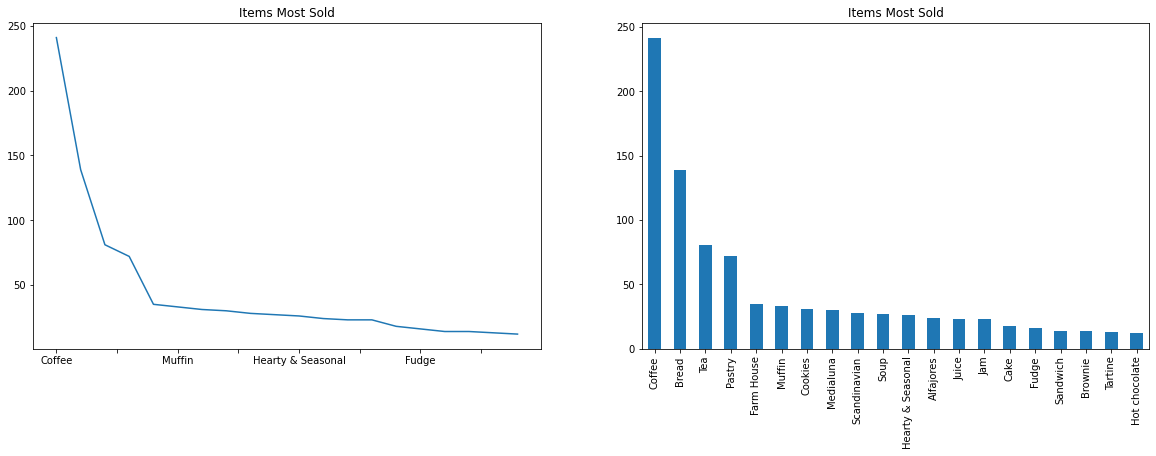

In [ ]:
# visualisasikan data penjualan item terbanyak ke line chart dan bar chart
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
#plt.plot(most_sold)
most_sold.plot(kind='line')
plt.title('Items Most Sold')


plt.subplot(1,2,2)
most_sold.plot(kind='bar')
plt.title('Items Most Sold')

Berdasarkan hasil visualisasi, coffee adalah barang yang paling banyak terjual, diikuti  olehbread, tea, pastry  dan Farm House. Ini masuk akal untuk toko roti. Sekarang setelah kita mengetahui item mana yang paling populer, mari kita lihat bulan mana yang menghasilkan penjualan paling banyak.

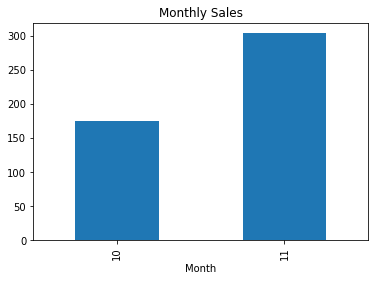

In [ ]:
df.groupby('Month')['Transaction'].nunique().plot(kind='bar', title='Monthly Sales')
plt.show()

Pada visualisasi, karena pengurangan data menjadi 1000, data yang terbaca hanya pada bulan 10 dan 11

In [ ]:
print(df.groupby('Month')['Day'].nunique())

Month
10    2
11    4
Name: Day, dtype: int64


Pada bulan 10 hanya tercatat 2 hari dan pada bulan 11 hanya tercatat 4 hari

## **5. Market Basket Analysis**

Pertama kita mengubah item list menjadi data transaksi dengan menggunakan TransactionEncoder.
Kita akan menggunakan frequent item-sets untuk menghasilkan aturan asosiasi dengan menggunakan algoritma Apriori.


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

kita membuat list transaction_list() yang unik sehingga kita dapat mengubah data kita ke dalam format yang benar 

In [ ]:
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in df['Transaction'].unique():
    tlist = list(set(df[df['Transaction']==i]['Item']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

479


kita menggunakan TransactionEncoder untuk merubah bentuk transaction_list()

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
frequent_itemsets = apriori(df2, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='support', min_threshold=0.05)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

,antecedents,consequents,support,confidence,lift
2,(Coffee),(Pastry),0.068894,0.162562,1.179803
3,(Pastry),(Coffee),0.068894,0.500000,1.179803
0,(Bread),(Coffee),0.068894,0.244444,0.576793
1,(Coffee),(Bread),0.068894,0.162562,0.576793


# **Kesimpulan**

<b>Support</b>
<ol>1. Pelanggan yang membeli coffee dan Pastry sebanyak 6% dari total transaksi</ol>
<ol>2. Pelanggan yang membeli Bread dan Coffe sebanyak 6% dari total transaksi</ol>

<b>Confidence</b>
<ol>1. Peluang pelanggan membeli Pastry jika membeli coffe adalah sebesar 16%</ol>
<ol>2. Peluang pelanggan membeli Coffe jika membeli Pastry adalah sebesar 50%</ol>
<ol>3. Peluang pelanggan membeli Coffee jika membeli Bread adalah sebesar 24%</ol>
<ol>4. Peluang pelanggan membeli Bread jika membeli Coffee adalah sebesar 16%</ol>

<b>Lift</b>
<ol>1. Pembelian coffee dan Pastry memiliki korelasi positif dengan nilai 1.17</ol>
<ol>2. Pembelian coffee dan Bread memiliki korelasi negatif dengan nilai 0.5</ol>